## Lab 4 - Prototypicality

This lab must be done **individually**. The required packages have been imported for you below.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import spatial  

**Optional**: Uncomment the following line of code to sanity-check your `pearsonr` function below.

In [50]:
#from scipy.stats import pearsonr

Data adapted from Leuven Concept Database (De Deyne et al., 2008). 

Import data for the lab. 

**Hint**: Check what these variables are by printing them out.

In [51]:
with open("data-prototypicality.pickle", "rb") as f:
    birdnames, F, goodness, features = pickle.load(f) 
#F variable has rankings of features according to each bird
#235 features, 23 birds, 23 participants.

In this lab, you will construct a simple cognitive model that reproduces human judgments of prototypicality about birds (see corresponding lecture notes for details, particularly the slide that shows the big list of prototypicality ratings on different birds such as sparrows and penguins, in the experiment performed by Rosch).

All the essential variables have been imported for you, and please spend some time trying to understand their corresponding data structures, recorded in "birdnames", "F", "goodness", and "features", respectively. Specifically, you will be modelling prototypicality for the birds described in "birdnames". The feature matrix "F" records all the features that people have come up with for these birds, as well as the applicability of the features to the birds. Each entry in this matrix records how many participants considered a feature applies to a bird: 0 indicates that no one considered a bird to have a certain feature, and a higher count (integer) indicates that at least 1 person considered a bird to have a certain feature. You will need to use all features for your model, and all features are annotated in "features". Finally, "goodness" contains prototypicality ratings taken directly from Rosch's list as shown on the lecture slide (mentioned above). The idea of the following exercise is for you to construct a prototypicality model, such that the model-constructed prototypicality ratings for all the birds in question should ultimately correlate with the ratings recorded in "goodness". Note that the conceptual basis for the prototype model has been already discussed in class---see lecture notes posted.



### Task 1 [0.5 pt]

Calculate the prototype feature vector from all birds, using the `F` variable.

In [52]:
# Write your code here.
#loop through each of the bird feature vector.

#each entry in this matrix records how many participants considered a feature applies to a bird: 
#0 indicates that no one considered a bird to have a certain feature, 
#and a higher count (integer) indicates that at least 1 person considered a bird to have a certain feature.
#output: 23 by 1 matrix
#sum of all features for each bird
#F[a][b] people considered feature F[a] to belong to bird
#how many people considered F[a] feature to apply to F[a][b] bird!
#adding all the numbers in a column = features that apply to this bird

prototype=[] #prototype feature vector

sumcolumn=F.sum(axis=0)

for x in sumcolumn:
    prototype.append(x/235)
    
print(prototype)



[1.1106382978723404, 1.0808510638297872, 1.1872340425531915, 0.9787234042553191, 1.025531914893617, 0.9148936170212766, 1.0765957446808512, 0.8723404255319149, 0.8808510638297873, 0.9531914893617022, 0.9063829787234042, 1.025531914893617, 1.1404255319148937, 0.9446808510638298, 1.0340425531914894, 0.9787234042553191, 0.9063829787234042, 0.9191489361702128, 0.8765957446808511, 0.8893617021276595, 1.1702127659574468, 1.0170212765957447, 1.0127659574468084]


### Task 2 [1 pt]
Calculate Euclidean distance of each bird to the prototype feature vector. 

**Hint**: use `spatial.distance.euclidean(x,y)`.

In [53]:
# Write your code here.
dist = [] #euclidean distance of each bird to prototype feature vector
for i in range(len(goodness)):
    dist.append(spatial.distance.euclidean(goodness[i],prototype[i]))
    
print(dist)

[0.6393617021276596, 0.3791489361702127, 2.052765957446809, 1.711276595744681, 3.064468085106383, 0.5051063829787233, 2.943404255319148, 1.097659574468085, 0.8891489361702127, 0.47680851063829777, 0.2736170212765957, 2.074468085106383, 0.9295744680851061, 0.5853191489361702, 2.2759574468085106, 2.001276595744681, 3.623617021276596, 0.10085106382978726, 0.9034042553191489, 3.2306382978723405, 1.7897872340425531, 0.9429787234042553, 2.1472340425531917]


### Task 3 [2.5 pts]

Write a generic function that calculates Pearson correlation between two arrays `a` and `b`. 

In [54]:
def pearsonr(a,b):
    
    # Write your code here.
    cov = 0
    for i in range(len(a)):
        cov += (a[i]-np.mean(a)) * (b[i]-np.mean(b))
    final = cov/len(a)
    denom = np.std(a)* np.std(b)
    pearson = final / denom
    return pearson
"""PC refers to linear rl between x and y. The resulting value is in the [-1,+1] range."""

'PC refers to linear rl between x and y. The resulting value is in the [-1,+1] range.'

### Task 4 [1 pt]

Calculate and report the Pearson correlation between empirical ratings in "goodness" and distances of birds to prototype.

In [55]:
# Write your code here.
p = pearsonr(dist,goodness)
print(p)

0.9958817476720048


### Task 5 & Task 6 [2 pts]
**Task 5**: Scatter-plot "goodness" ratings (y-axis) against distances of birds to prototype (x-axis); label both axes. **[1 pt]**

**Task 6**: Fit a line to these data points and show that line on the plot. **[1 pt]**

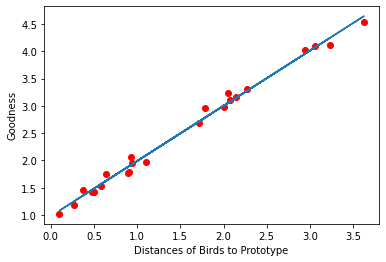

In [56]:
# Write your code here.
plt.plot(dist, goodness, "ro")
plt.xlabel("Distances of Birds to Prototype")
plt.ylabel("Goodness")
m, b = np.polyfit(dist, goodness, 1)
y = []
for i in range(len(dist)):
    y.append((m*dist[i])+b)
plt.plot(dist,y)
plt.show()

### Task 7 [3 pts]
**Task 7**: a) Propose and justify a simple method of improving the correlation; b) Implement your proposal and show it works. **[3 pts]**


# Write your solution here.
    a)The pearson correlation coefficient is very close to 1, which implies that the data is biased. In order to remove the bias, reduce the coefficient value by increasing the difference between the two variables’ observations. This is done by identifying the independent variable observation, which is same or close to dependent observation value, and replacing it with the value which would increase the difference between the variables. 


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 

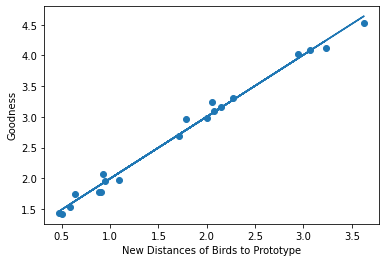

0.9951346845590738


In [60]:
#b
new_dist = []
i_s = []
new_goodness = []
for i in range(len(dist)):
    if dist[i] > 0.4:
        new_dist.append(dist[i])
        new_goodness.append(goodness[i])
new_p = pearsonr(new_dist,new_goodness)

plt.scatter(new_dist, new_goodness)
plt.xlabel("New Distances of Birds to Prototype")
plt.ylabel("Goodness")
m, b = np.polyfit(new_dist, new_goodness, 1)
y = []
for i in range(len(new_dist)):
    y.append((m*new_dist[i])+b)
plt.plot(new_dist,y)
plt.show()

print(new_p)

b)This value of pearson correlation coefficient is smaller than before, indicating that variables that were causing a bias have been removed